<h1 align="center"><font color="0066FF" size=110>Partial Differential Equations I: Introduction & Finite Difference Method</font></h1>


In [8]:
import numpy as np
import matplotlib
#from IPython.html.widgets import interact
from ipywidgets import interact
from IPython.display import Image
try:
    %matplotlib inline
except:
    # not in notebook
    pass

LECTURE = False
if LECTURE:
    size = 20
    matplotlib.rcParams['figure.figsize'] = (10, 6)
    matplotlib.rcParams['axes.labelsize'] = size
    matplotlib.rcParams['axes.titlesize'] = size
    matplotlib.rcParams['xtick.labelsize'] = size * 0.6
    matplotlib.rcParams['ytick.labelsize'] = size * 0.6
import matplotlib.pyplot as plt


# Learning Outcomes

After studying this notebook you should be able to
-   Describe the difference between an Ordinary Differential Equation (ODE) and a Partial Differential Equation (PDE);
-   Give some examples of PDEs;
-   Derive the first central difference approximations for the $f'(x)$ and $f''(x)$;
-   Use the finite difference method to solve the Laplace equation in 1D;

# Introduction

Along with the Ordinary Differential Equations (ODEs) we have considered previously, partial differential equations (PDEs) are another way in which we model problems in science and engineering. Their solution occupies a large amount of the time consumed on large scale high performance computers for tasks such as computational fluid dynamics, computational mechanics and computational electromagnetics which are used for modelling systems as diverse in size scale and complexity as climate and environmental modelling, the Universe, cars, planes, trains, ships and optical devices.

Specialist courses exist which will study an individual application domain and its equations in huge detail and often highly tuned and specialised computational methods (and indeed even whole computer architectures and subsystems) have been developed for a particular system. Our purpose in this section is to introduce some of the key concepts and methods that underpin this universe of modelling possibilities.

## Difference between ODEs and PDEs

-   ODEs are differential equations containing **a single independent variable** so all the derivatives are ordinary dervatives. For example, given a scalar function $x \mapsto f(x)$, the first and second derivatives are $f'$ or $f''$.
-   PDEs are differential equations containing **two or more independent variables**, so the derivatives are partial derivatives. For example, given a function of two variables $(x,y) \mapsto f(x,y)$, the partial derivatives with respect to $x$ and $y$ are $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$.

## PDE example I: Laplace equation

The Laplace equation is a second orderd PDE appearing for example in Fluid Mechanics (potential flows) and Electromagnetics (electromagnetic field in a charge free region):

\begin{align}
&\text{General:} \qquad &\nabla^2 \phi = 0, \\
&\text{2D:} \qquad &\frac{\partial^2 \phi}{\partial x^2}  + \frac{\partial^2 \phi}{\partial y^2} = 0,
\end{align}

where $\phi$ represents, for example, the velocity potential.

## PDE example II: Heat equation

The heat equation is a second order PDE describing how temperature $T$ diffuses through a medium of thermal diffusivity $\alpha$:

\begin{align}
&\text{General:} \qquad &\frac{\partial T}{\partial t} = \alpha \nabla^2 T  \\
&\text{2D:} \qquad &\frac{\partial T}{\partial t} = \alpha\left( \frac{\partial^2 T}{\partial x^2}  + \frac{\partial^2 T}{\partial y^2} \right)
\end{align}

## PDE example III: Wave equation

The wave equation describes how the sound pressure $p$ propagates at speed $c_0$ through a medium (at rest), and plays a role in acoustics, fluid mechanics, but also cosmology and quantum mechanics:

\begin{align}
&\text{General:} \qquad &\frac{1}{c_0^2}\frac{\partial^2 p}{\partial t^2} +  \nabla^2 p = 0  \\
&\text{2D:} \qquad &\frac{1}{c_0^2} \frac{\partial^2 p}{\partial t^2} + \frac{\partial^2 p}{\partial x^2}  + \frac{\partial^2 p}{\partial y^2} = 0
\end{align}

## General form of a scalar PDE

In a scalar PDE of order $n$ for a function of two variable $(x,y) \mapsto f(x,y)$ will be of the form

\begin{equation}
F\left(f, \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial^2 f}{\partial x^2}, \frac{\partial^2 f}{\partial y^2}, \frac{\partial^2 f}{\partial x\partial y}, \cdots, \frac{\partial^{i+j} f}{\partial x^i \partial y^j}, \cdots, \frac{\partial^n f}{\partial x^n}, \frac{\partial^n f}{\partial y^n} \right) = 0,
\end{equation}

where $F$ is a function that defines the PDE and $1 \leq i \leq n$, $1 \leq j \leq n$ and $i + j \leq n$.

## Solution strategy for the Heat equation

Let's consider the heat equation from example II in 1D:

\begin{align}
&\text{1D Heat Equation:} \qquad &\frac{\partial f}{\partial t} = \alpha\left( \frac{\partial^2 f}{\partial x^2}\right).
\end{align}

Given the solution at a time step $t_0$ the challenge is to estimate the solution at a later time $t_0 + h$. This is almost the same problem we had for ODEs, where we learned how to solve equations of the form

\begin{align}
g'(t) = F(t, g(t)),
\end{align}

using Euler's method or Runge-Kutta methods. Thus, if we could rewrite the right hand side of the heat equation as a function of time and $f$ (rather than $\frac{\partial f}{\partial t}$) we'd be able to apply all the techniques we have learned in our study of ODEs to advance our solution in time.

We therefore seek to approximate the second order partial derivative as

\begin{align}
\frac{\partial f}{\partial t} \approx F(f, x, t),
\end{align}

so that we can write

\begin{align}
\frac{\partial f}{\partial t} \approx \alpha F(f, x, t),
\end{align}

which is an ODE we know how to solve.

The key challenge is therefore to find good approximations for the spatial derivative with respect to $x$, in terms of only $f(x, t)$, $x$ and $t$. The *finite difference method* is a simple but powerful method for doing exactly this. The finite difference method will be introduced in the next section. It will then be used to solve the Laplace equation, which corresponds to the steady state solution of the Heat Equation. Solving the Heat Equation itself will be left as an exercise to the reader.

# The finite difference method

## First central difference for first $f'(x)$

Our aim with these methods is to replace the differential operator with an approximation which averages over nearby points and by using a mesh of such points we derive a set of simultaneous equations to solve. The trick is to apply Taylor's expansions at points near $f(x)$, such as $f(x-h)$ and $f(x+h)$, and to combine these expansions to obtain an approximation for the desired derivative.

Consider the following two Taylor expansions of a function f(x) around x at a (small) distance, h (see e.g. [​1])

\begin{align}
f(x + h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \frac{h^4}{4!} f^{(4)}(x) + O(h^5), \\
f(x - h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) + \frac{h^4}{4!} f^{(4)}(x) + O(h^5).\\
\end{align}

If we substract these two equations we get

\begin{align}
f(x + h) - f(x - h) = 2h f'(x) + \frac{h^3}{3} f'''(x) + O(h^5).
\end{align}

Rearranging gives

\begin{align}
f'(x) &= \frac{f(x + h) - f(x - h)}{2h} - \frac{h^2}{3} f'''(x) + O(h^4), \\
f'(x) &= \frac{f(x + h) - f(x - h)}{2h} + O(h^2).
\end{align}

This is known as the *first central difference approximation* for the *first* derivative of $x \mapsto f(x)$. It is accurate to order 2. It was derived by using Taylor's expansion for $f$ at two points around $x$: $x+h$ and $x-h$. These points are symmetric with respect to $x$. It is also possible to use *staggered* finite difference approximations such as the *first forward difference* for the first derivative, that expresses $f'(x)$ in terms of $f(x)$, $f(x + h)$ and $f(x + 2h)$.

### Self study: Exercise 1

Derive the first forward difference in terms of $f(x)$, $f(x + h)$ and $f(x + 2h)$.

## First central difference for $f''(x)$

It is also possible to obtain finite difference approximations for higher order derivatives. For example, if we add the two Taylor expansions for $f(x+h)$ and $f(x-h)$ instead of subtracting them we get

\begin{align}
f(x + h) + f(x - h) = 2 f(x) + h^2 f''(x) + O(h^4).
\end{align}

Rearranging yields

\begin{align}
f''(x) = \frac{f(x-h) - 2 f(x) + f(x + h)}{h^2} + O(h^2).
\end{align}

This is known as the *first central difference approximation* for the *second* derivative of $f(x)$.

## General central finite difference for $f^{(n)}(x)$

It is possible to derive these for higher order derivatives to various order of accuracy. A general central difference approximation for $f^{(n)}(x)$ can be written in the form

\begin{equation}
f^{(n)}(x) = \sum_{i=-m}^m  c_i f(x + i h),
\end{equation}

where $(c_i)_{-m \leq i \leq m}$ define the *coefficients* of the finite difference. The points $(x+ih)_{-m\leq i \leq m}$ are called the *nodes* of the finite difference. The *nodes* and *coefficients* define a unique finite difference *stencil* . The length of the stencil is therefore $2m + 1$. Typically, the length of the stencil must be longer than $n$, and higher orders of accuracy can be obtained by using longer stencils.

Given a set of nodes $-m\leq i \leq m$, the stencil coefficients can be derived by applying Taylor's approximation to $f(x + i h)$ to the desired order of accuracy, for each value of $i$. This yields a system of $2m + 1$ equations with $2m + 1$ unkowns (the stencil coefficients $(c_i)$), which can be solved to obtain the set of coefficients that approximates a particular derivative to the desired order of accuracy. See for example [​2] for listings of these "stencils", or [Abramowitz and Stegun 25.3.21-25.3.31](http://people.math.sfu.ca/~cbm/aands/page_883.htm).

# Example: Laplace equation in 1D

A simple time dependent heat equation reduces to the Laplace equation in steady state (once the system has come to equilibrium). To show how the finite difference method can be used to solve PDEs we first start with a 1D problem, so that our PDE reduces to an ODE:

\begin{equation}
T''(x) = 0, \quad \text{with boundary conditions for}\quad T(x).
\end{equation}

We will first consider simple fixed boundary conditions for the problem.

Consider the problem which represents an inifinitely thin rod of length $L=1$ m, with temperature held constant at $0 \deg$ at one end and  $100 \deg$ at the other:

\begin{align}
T''(x) &= 0, &   T(0) &= 0 \deg, &  T(L) &= 100 \deg.
\end{align}

Discretizing gives us:

\begin{align}
T''(x) &= \frac{T(x - h) - 2 T(x) + T(x + h)}{h^2}, &   T(0) &= 0 \deg, &  T(L) &= 100 \deg
\end{align}

at each point on the rod, where the mesh separation is $h$.

## One unknown mesh point

![img](fig04-01.png "1D mesh with one unknown mesh point $T_0$.")

\begin{equation}
\frac{T_{-1} -2 T_0 + T_1}{h^2}  = 0,
\end{equation}

where $h = L/2$. Since $T_{-1} = 0 \deg$ and $T_1 = 100 \deg$, we have

\begin{equation}
T_0 = \frac{T_{-1} + T_1}{2} = 50 \deg
\end{equation}

This is what we expect because when the system is in equilibrium, the temperature should vary linearly along the rod from $0 \deg$ at $x=0$ to $100 \deg$ at $x=L$.

## Two unknown mesh points


![img](fig04-02.png "1D mesh with two unknown mesh point $T_0$ and $T_1$.")

If we discretize the Laplace equation at the two unknown mesh points $T_0$ and $T_1$ using the first central approximation for the second derivative $T''$, we get

\begin{equation}
\left\{\begin{aligned}
\frac{T_{-1} -2 T_0 + T_1}{h^2}  = 0 \\
\frac{T_{0} -2 T_1 + T_2}{h^2}  = 0,
\end{aligned}\right.
\end{equation}

where $h = L/3$. If we express our unkowns $T_0$ and $T_1$ in terms of our boundary conditions $T_{-1} = 0 \deg$ and $T_2 = 100 \deg$, we get

\begin{equation}
\left\{\begin{aligned}
-2 T_0 + T_1  = -T_{-1} \\
T_{0} -2 T_1  = -T_2,
\end{aligned}\right.
\end{equation}

or in matrix form

\begin{equation}
\begin{pmatrix}
-2 & 1 \\ 1 & -2
\end{pmatrix}
\begin{pmatrix}
T_{0} \\ T_1
\end{pmatrix}
=
\begin{pmatrix}
-T_{-1} \\ - T_2
\end{pmatrix}.
\end{equation}

Inverting the matrix yields

\begin{equation}
\begin{pmatrix}
T_{0} \\ T_1
\end{pmatrix}
=
\frac{1}{3}\left(\matrix{ {-2} & {-1} \cr {-1} & {-2} } \right)
\begin{pmatrix}
-T_{-1} \\ - T_2
\end{pmatrix}
= \frac{1}{3}
\begin{pmatrix}
2 T_{-1} + T_{2} \\
T_{-1} + 2T_{2}
\end{pmatrix}
=
\begin{pmatrix}
33.333333 \deg \\
66.666666 \deg
\end{pmatrix}
\end{equation}

Again, we see that the temperature varies linearly through the rod.

## Three unknown mesh points


![img](fig04-03.png "1D mesh with three unknown mesh point $T_0$, $T_1$ and $T_2$.")

For 3 unkown mesh points $T_0$, $T_1$, and $T_2$, we get the system of equations

\begin{equation}
\left\{\begin{aligned}
&\phantom{-2}T_{-1} -2 T_0  + \phantom{2}T_1 \phantom{ -2 T_2 + 2T_3} = 0 \\
&\phantom{-2T_{-1} -2} T_0  - 2 T_1 + \phantom{2}T_2 \phantom{ + 2T_3} = 0 \\
&\phantom{-2T_{-1} -2 T_0  - 2} T_1 - 2 T_2 + T_3 = 0,
\end{aligned}\right.
\end{equation}

or, in matrix form,

\begin{equation}
\begin{pmatrix}
-2 & 1 & 0 \\
1 & -2 & 1 \\
0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
T_{0} \\ T_1 \\ T_2
\end{pmatrix}
=
\begin{pmatrix}
-T_{-1} \\ 0 \\ - T_3
\end{pmatrix}.
\end{equation}

Solving this (with SymPy or SciPy, see below) gives

\begin{equation}
\begin{pmatrix}
T_{0} \\ T_1 \\ T_2
\end{pmatrix}
=
\frac{1}{4}
\begin{pmatrix}
{-3 } & {-2} & {-1 } \\ {-2} & -1 & {-2} \\ {-1 } & {-2} & {-3 }
\end{pmatrix}
\begin{pmatrix}
-T_{-1} \\ 0 \\ - T_3
\end{pmatrix}
=
\frac{1}{4}
\begin{pmatrix}
3T_{-1} + T_3 \\ 2 T_{-1} + 2 T_3 \\ - T_{-1} + 3 T_3
\end{pmatrix}
=
\begin{pmatrix}
25  \\ 50 \\ 75
\end{pmatrix}
 \deg.
\end{equation}

## Solving with SymPy, SciPy or Iterative Methods

Note that to solve the above linear system of equations we can use the iterative methods presented in the first section. This is left as an exercise. For such a short system, we can use SymPy to inverse the system symbolically. Another option is to use SciPy's `linalg` module for a numerical solution.
-   SymPy solution



In [22]:
from sympy import *
init_printing()
# boundary temperatures
Tm1 = 0
T3  = 100
b = Matrix([[-Tm1], [0], [-T3]])
# matrix to be inverted
A = [[-2, 1, 0],
     [1, -2, 1],
     [0, 1, -2]]

Ainv = Matrix(A)**(-1)
Ainv, b

ValueError: 
\left ( \left[\begin{smallmatrix}- \frac{3}{4} & - \frac{1}{2} & - \frac{1}{4}\\- \frac{1}{2} & -1 & - \frac{1}{2}\\- \frac{1}{4} & - \frac{1}{2} & - \frac{3}{4}\end{smallmatrix}\right], \quad \left[\begin{smallmatrix}0\\0\\-100\end{smallmatrix}\right]\right )
              ^
Expected "\right" (at char 14), (line:1, col:15)

⎛⎡-3/4  -1/2  -1/4⎤, ⎡ 0  ⎤⎞
⎜⎢                ⎥  ⎢    ⎥⎟
⎜⎢-1/2   -1   -1/2⎥  ⎢ 0  ⎥⎟
⎜⎢                ⎥  ⎢    ⎥⎟
⎝⎣-1/4  -1/2  -3/4⎦  ⎣-100⎦⎠

In [23]:
# Get the temperatures
Ainv * b

ValueError: 
\left[\begin{smallmatrix}25\\50\\75\end{smallmatrix}\right]
      ^
Expected "\right" (at char 6), (line:1, col:7)

⎡25⎤
⎢  ⎥
⎢50⎥
⎢  ⎥
⎣75⎦

-   SciPy solution



In [13]:
import scipy.linalg as linalg
linalg.solve(A, b)

ValueError: object arrays are not supported

For $N+2$ mesh points, using the first central difference for the second derivative to discretize the 1D Laplace equation, with boundary conditions  $T_{-1} = 0 \deg$ and $T_{N+1} = 100 \deg$, yields:

\begin{equation}
\begin{pmatrix}
          -2 & 1 &  0 & \cdots & \cdots & 0 \\
          1 & \ddots & \ddots & \ddots &  & \vdots \\
          0 & \ddots & \ddots & \ddots & \ddots   &  \vdots \\
          \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
          \vdots &   & \ddots & \ddots & \ddots & 1 \\
          0 & \cdots &  \cdots & 0 & 1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
T_0 \\ T_1 \\ \vdots \\ \vdots \\ T_{N-1} \\ T_{N}
\end{pmatrix}
=
\begin{pmatrix}
-T_{-1} \\ 0 \\ \vdots \\ \vdots \\ 0 \\ -T_{N+1}
\end{pmatrix},
\end{equation}

A similar system of equation (with periodic boundary conditions) was solved using the Gauss-Seidel method in [Example 1 of Notebook 1](http://www.southampton.ac.uk/~feeg6002/lecturenotes/feeg6002_numerical_methods01.html#Example-1). Whilst these solutions are straightforward our aim was to show the process of going from the differential equation to a set of linear equations that we can solve. This discretization process is the key step to solving an ODE or a PDE with a computer. The finite difference method is a powerful yet simple discretization method that we will focus on in this course.

## Self study: Exercise 2

1.  Use the Gauss-Seidel method to solve the above system of equations for $N=100$.
2.  Use a generic solver such as `scipy.linalg.solve` to validate your solution.
3.  \*Solve the full heat equation in 1D with $T_0 = 0$ and $T_L = 100$, starting from a uniform initial temperature of $T=0$. Use the Runge-Kutta method (RK4) to solve the 1D heat equation with $\alpha= 1.172 \cdot 10^{-5} \text{m}^2\text{s}^{-1}$ and calculate the temperature distribution for $0 \leq t \leq  25000 \text{s}$, using 10000 time steps and $N=100$ unkown mesh points $0 < x_i < L$ (where $L=1$ m).

# Conclusions

-   ODEs are differential equations involving 1 independent variable, PDEs involve two or more independent variables;
-   Classical examples of PDEs are the Laplace equation, the Heat equation and the Wave equation.
-   The first central difference approximations for $f'(x)$ and $f''(x)$ can be derinved by combining the Taylor expansions of $f(x+h)$ and $f(x - h)$ to order 3.
-   The finite difference method can be used to discretize the 1D Laplace equation

\begin{equation}
T''(x) = 0,
\end{equation}

with boundary conditions $T(0) = T_0$ and $T(L) = T_L$, which yields a linear system of equation of the form

\begin{equation}
A X = B,
\end{equation}

where $A$ is a matrix describing the Laplace operator, $X$ is the vector of unknowns describing the temperature at the inner mesh points, and $B$ is a vector containing the boundary conditions. This system can be solved analytically or symbolically (for small number of unkowns), or using direct or iterative methods for large number of unkowns.

In the next lecture, we will solve our first PDE: the Laplace equation in two dimensions:

\begin{align}
\frac{\partial^2 T}{\partial x^2}  + \frac{\partial^2 T}{\partial y^2} = 0.
\end{align}

# References

1.  Jaan Kiusalaas, [Numerical Methods in Engineering with Python](http://www.amazon.com/Numerical-Methods-Engineering-Python-Kiusalaas/dp/0521191327), 2010.
2.  Zwillinger, D. (1998). *Handbook of differential equations (Vol. 1)*. Gulf Professional Publishing.[ {google books} ](https://books.google.co.uk/books?id%3DYD4PL0GZgOcC&printsec%3Dfrontcover&source%3Dgbs_ge_summary_r&cad%3D0#v%3Dsnippet&q%3Dlook%2520up%2520technique&f%3Dfalse)

# Solution to exercise 2.3

## Input parameters

Define the spatial grid and the number of time steps.



In [28]:
#%debug
# Spatial grid
N = 100                           # number of unkowns
X = np.linspace(0, 1, N+2)        # grid array
#pprint(X)
# Remove the edge points from the grid
X = X[1:-1]
H = X[1] - X[0]                   # grid step
#pprint(X)
#pprint(H)

# Time grid
TIME_MIN = 0
TIME_MAX = 25000
NTIME = 10000

# Discretised Laplace operator for inner points [1:-1]
A = (np.diag(-2 * np.ones(N)) +
     np.diag(np.ones(N - 1), 1) +
     np.diag(np.ones(N - 1), -1) )
pprint(A)



[[-2.  1.  0. ...,  0.  0.  0.] 
 [ 1. -2.  1. ...,  0.  0.  0.] 
 [ 0.  1. -2. ...,  0.  0.  0.] 
              ...,              
 [ 0.  0.  0. ..., -2.  1.  0.] 
 [ 0.  0.  0. ...,  1. -2.  1.] 
 [ 0.  0.  0. ...,  0.  1. -2.]]


## Initial and boundary conditions



In [37]:
def initial_condition(x=X, init='gaussian'):
    """Return the initial temperature over the inner points of the
    grid (where are unkown mesh points are).
    """
    if init == 'gaussian':
        return 100 * np.exp(-(x - 0.5)**2 / (2 * 0.1**2))
    elif init == 'zero':
        return np.zeros_like(X)

def right_bc(t):
    """Return the right boundary condition and its time derivative"""
    return 100.0

def left_bc(t, amplitude=0.0, omega=2 * np.pi / 1000.0):
    """Return the left boundary condition and its time derivative """
    # set amplitude to, say, 50 deg to see the effect of an
    # oscillating temperature
    return amplitude * np.sin(omega * t)




Solve the ODE

\begin{align}
\frac{\partial T}{\partial t} = F(t, T(t)) &= \alpha \frac{\partial^2 T}{\partial x^2}
                                           &\approx \alpha \frac{1}{h^2}(\mathbf A \mathbf T + \mathbf B),
\end{align}

where $\mathbf A$ is the discretized Laplace operator, $\mathbf T$ is the vector of unkown temperatures, and $\mathbf B$ is an additional vector storing the boundary conditions at the left and right boundary. These can be time dependent.

\begin{align}
\mathbf A &=
\begin{pmatrix}
          -2 & 1 &  0 & \cdots & \cdots & 0 \\
          1 & \ddots & \ddots & \ddots &  & \vdots \\
          0 & \ddots & \ddots & \ddots & \ddots   &  \vdots \\
          \vdots & \ddots & \ddots & \ddots & \ddots & 0 \\
          \vdots &   & \ddots & \ddots & \ddots & 1 \\
          0 & \cdots &  \cdots & 0 & 1 & -2 \\
\end{pmatrix}, &
\mathbf T &=
\begin{pmatrix}
T_0 \\ T_1 \\ \vdots \\ \vdots \\ T_{N-1} \\ T_{N}
\end{pmatrix}, &
\mathbf B &=
\begin{pmatrix}
-T(x=0, t) \\ 0 \\ \vdots \\ \vdots \\ 0 \\ -T(x=L, t)
\end{pmatrix},
\end{align}

### Define the function $F(t, T)$ for the Runge-Kutta solver



In [38]:
def F(t, T, alpha=1.72e-5):
    """Return alpha d^2 T(x,t) / dx^2 using central finite difference
    approximation.
    """
    # Store boundary conditions as a vector
    b = np.zeros(N)
    b[0] = left_bc(t)
    b[-1] = right_bc(t)
    # Return dT/dt = alpha d^2T/dx^2 = F(t, T)
    return  alpha * (np.dot(A, T.transpose()) + b) / H**2



### Runge-Kutta method

This is copied from notebook 3 (ODE II).



In [40]:
def rk4(F, a, b, ya, n):
    """Solve the first order initial value problem
         y'(t) = F(t, y(t)),
          y(a) = ya,
    using the Runge-Kutta method and return a tuple made of two arrays
    (tarr, yarr) where 'ya' approximates the solution on a uniformly
    spaced grid 'tarr' over [a, b] with n elements.

    Parameters
    ----------
    F : function
         A function of two variables of the form F(t, y), such that
         y'(t) = F(t, y(t)).
    a : float
         Initial time.
    b : float
         Final time.
    n : integer
         Controls the step size of the time grid, h = (b - a) / (n - 1)
    ya : float
         Initial condition at ya = y(a).
    """
    tarr = np.linspace(a, b, n)
    h = tarr[1] - tarr[0]
    ylst = []
    yi = ya
    #import pdb; pdb.set_trace()
    for t in tarr:
        #print yi[len(yi) // 2]
        ylst.append(yi.copy())
        k1 = F(t, yi)
        k2 = F(t + 0.5 * h, yi + 0.5 * h * k1)
        k3 = F(t + 0.5 * h, yi + 0.5 * h * k2)
        k4 = F(t + h, yi + h * k3)
        yi +=  h / 6.0 * (k1 + 2.0 * k2 + 2.0 * k3 + k4)
    yarr = np.array(ylst)
    return tarr, yarr



### Define the solver



In [41]:
def solve_heat(init='gaussian'):
    """Solve the Heat equation and return the time and Temperature arrays
    init : string
        Controls the initial boundary condition.
        Current options are 'gaussian' and 'zero'
    """
    Tinit = initial_condition(X, init)  # of size N
    tarr, Tarr = rk4(F, TIME_MIN, TIME_MAX, Tinit, NTIME)
    return tarr, Tarr



### Solve the heat equation and plot the result



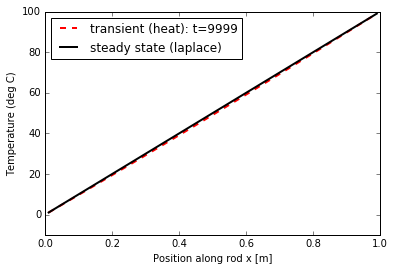

In [42]:
INIT = 'zero'
tarr, Tarr = solve_heat(INIT)
plt.figure(1)
def plot_sol(frame=0, init='zero'):
    global tarr, Tarr, INIT
    if init != INIT:
        tarr, Tarr = solve_heat(init)
        INIT = init
    plt.clf()
    plt.plot(X, Tarr[frame], '--r', lw=2, label='transient (heat): t=%d' % frame)
    plt.plot(X, 100*X, 'k', lw=2, label='steady state (laplace)')
    plt.axis([0, 1, -10, 100])
    plt.legend(loc='best')
    plt.xlabel('Position along rod x [m]')
    plt.ylabel('Temperature (deg C)')
if LECTURE:
    i = interact(plot_sol, frame=[0, NTIME - 1], init=('zero', 'gaussian'))
else:
    plot_sol(frame=NTIME-1, init='zero')
#plt.savefig('fig04-04.pdf')



<fig04-04.pdf>

